In [66]:
#I will write a function, that takes in an aminoacid sequence and the positions where this sequence is to sliced. By this, further domain comparisons are made possible
import pandas as pd
import data_cleanup as dc
import domain_comparison as doc
import data_exploration as de
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
df = pd.read_csv(fpath)


In [3]:
DNA_domain2 = doc.slice_domain(df, start=102, end=292)
DNA_domain2

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position_mut,AS_old,AS_new
1919,T102Q,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.968781,1,102,T,Q
1920,T102P,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.408719,1,102,T,P
1921,T102R,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.020282,1,102,T,R
1922,T102Y,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.479631,1,102,T,Y
1923,T102V,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.112441,1,102,T,V
...,...,...,...,...,...,...,...
5543,K292F,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.895336,1,292,K,F
5544,K292E,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.021127,1,292,K,E
5545,K292N,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.284768,1,292,K,N
5546,K292A,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.655653,1,292,K,A


In [47]:
# Saving the different domains for better accessibility

#Transactivation Domain 1
t1_start = 1
t1_end = 43

#Transactivation Domain 2
t2_start = 44
t2_end = 63

#Proline-rich Region
pr_start = 64
pr_end = 92

#DNA Binding Domain
dna_start = 102
dna_end = 292

#Tetramerization Domain
tetra_start = 320
tetra_end = 355

#Regulatory Domain
reg_start = 356
reg_end = 393



t1_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t1_start, end= t1_end)))
t1_list = doc.slice_domain(df, start= t1_start, end= t1_end)

t2_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t2_start, end= t2_end)))
t2_list = doc.slice_domain(df, start= t2_start, end= t2_end)

pr_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= pr_start, end= pr_end)))
pr_list = doc.slice_domain(df, start= pr_start, end= pr_end)

dna_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= dna_start, end= dna_end)))
dna_list = doc.slice_domain(df, start= dna_start, end= dna_end)

tetra_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= tetra_start, end= tetra_end)))
tetra_list = doc.slice_domain(df, start= tetra_start, end= tetra_end)

reg_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= reg_start, end= reg_end)))
reg_list = doc.slice_domain(df, start= reg_start, end= reg_end)


## Mean values

In [48]:
t1_mean = t1_domain.mean().rename('mean')

t2_mean = t2_domain.mean().rename('mean')

pr_mean = pr_domain.mean().rename('mean')

dna_mean = dna_domain.mean().rename('mean')

tetra_mean = tetra_domain.mean().rename('mean')

reg_mean = reg_domain.mean().rename('mean')

t1_mean

position_mut  AS_old
1             M        -1.120068
2             E         0.059833
3             E        -0.002861
4             P         0.346287
5             Q         0.302666
6             S         0.193160
7             D         0.278784
8             P         0.198627
9             S         0.149515
10            V         0.487048
11            E         0.281089
12            P         0.418316
13            P         0.299618
14            L         0.390461
15            S         0.402770
16            Q         0.290888
17            E         0.353817
18            T        -0.354892
19            F        -1.473280
20            S         0.120160
21            D        -0.070605
22            L        -0.780215
23            W        -1.478667
24            K        -0.556430
25            L        -0.189364
26            L        -1.157679
27            P         0.349025
28            E         0.349895
29            N         0.435950
30            N       

## Distribution
### Transactivation Domain 1

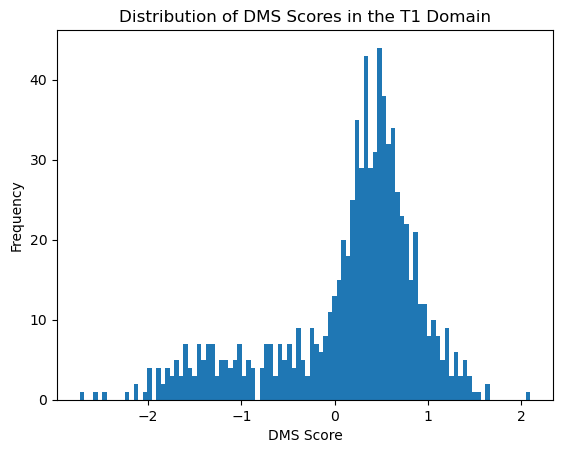

0.15764247773307719
0.3563590622805779


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

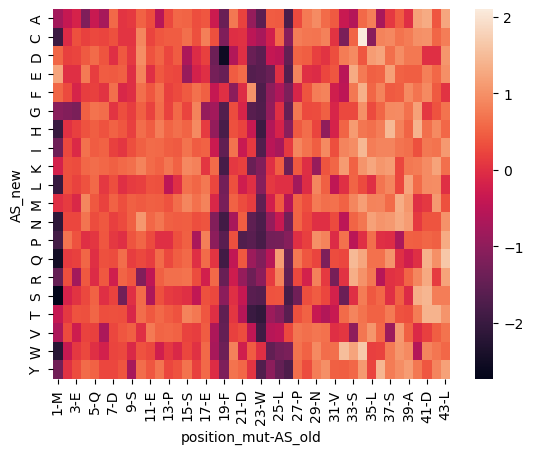

In [73]:

dms_scores_t1 = t1_list['DMS_score']

plt.hist(dms_scores_t1, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T1 Domain')
plt.show()

print(dms_scores_t1.mean())
print(dms_scores_t1.median())
sns.heatmap(t1_domain)

### Transactivation Domain 2

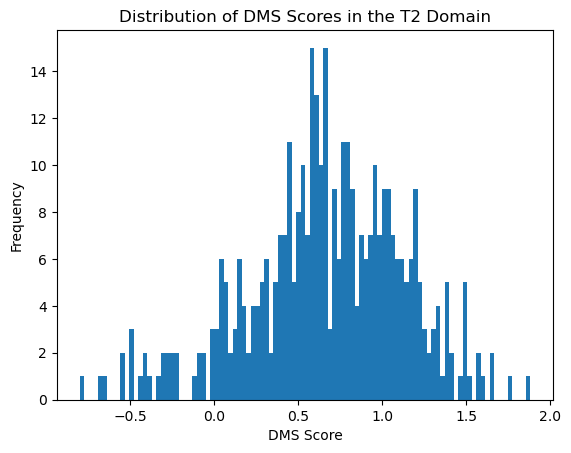

In [61]:

dms_scores_t2 = t2_list['DMS_score']

plt.hist(dms_scores_t2, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T2 Domain')
plt.show()


### Proline-rich Region

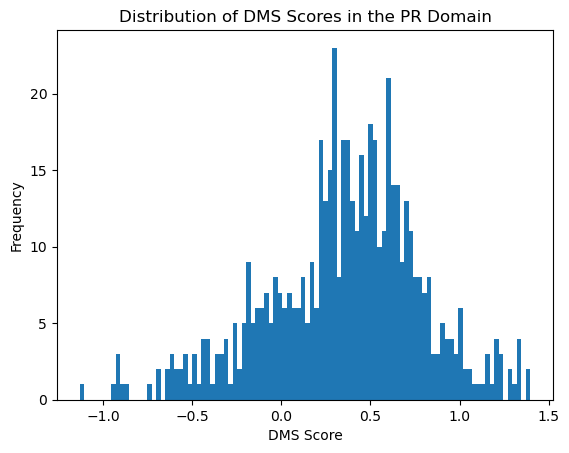

In [62]:
dms_scores_pr = pr_list['DMS_score']

plt.hist(dms_scores_pr, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the PR Domain')
plt.show()


### DNA Binding Domain

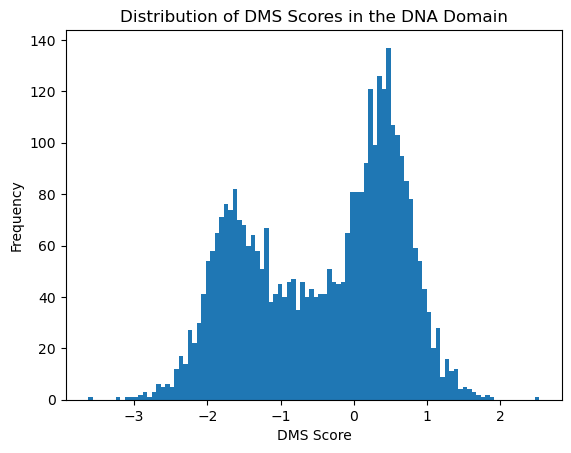

-0.41853493152187216
-0.1542472141413489


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

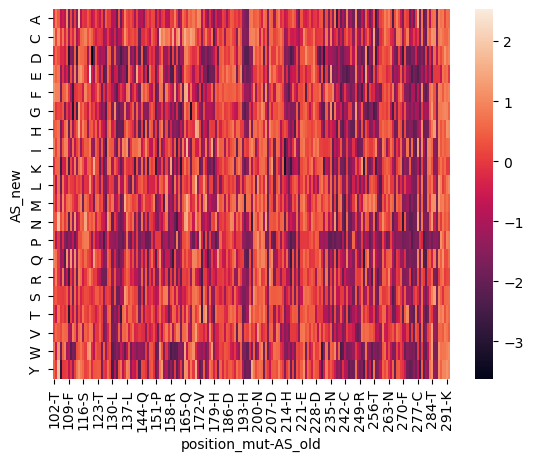

In [74]:

dms_scores_dna = dna_list['DMS_score']

plt.hist(dms_scores_dna, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the DNA Domain')
plt.show()

print(dms_scores_dna.mean())
print(dms_scores_dna.median())


sns.heatmap(dna_domain)

### Tetramerization Domain

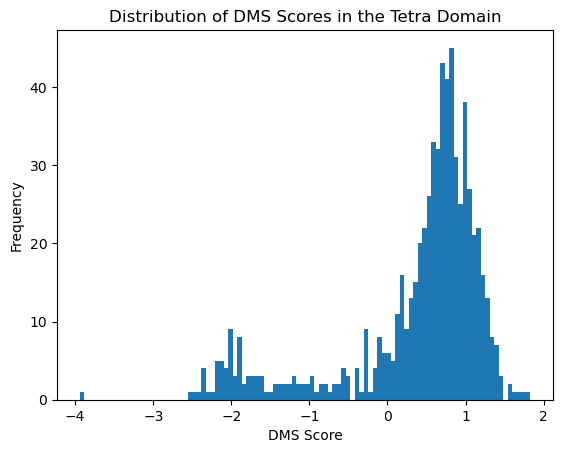

0.38310175884048514
0.6825000159182895


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

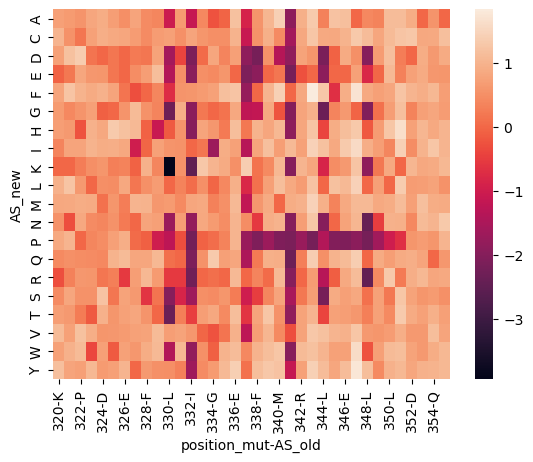

In [75]:

dms_scores_tetra = tetra_list['DMS_score']

plt.hist(dms_scores_tetra, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Tetra Domain')
plt.show()

print(dms_scores_tetra.mean())
print(dms_scores_tetra.median())

sns.heatmap(tetra_domain)

### Regulatory Domain

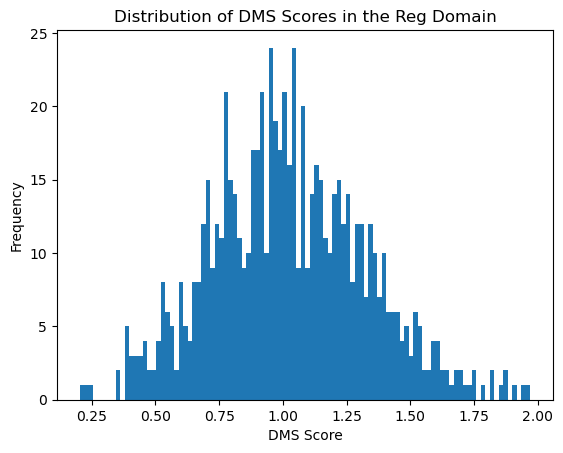

In [65]:

dms_scores_reg = reg_list['DMS_score']

plt.hist(dms_scores_reg, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Reg Domain')
plt.show()


## Standard deviation


In [19]:

t1_std = t1_mean.std()
t2_std = t2_mean.std()
pr_std = pr_mean.std()
dna_std = dna_mean.std()
tetra_std = tetra_mean.std()
reg_std = reg_mean.std()

std_combined = pd.DataFrame({
    't1_std': [t1_std],
    't2_std': [t2_std],
    'pr_std': [pr_std],
    'dna_std': [dna_std],
    'tetra_std': [tetra_std],
    'reg_std': [reg_std]
})

std_combined

,t1_std,t2_std,pr_std,dna_std,tetra_std,reg_std
0,0.58232,0.139765,0.114398,0.675449,0.582153,0.138924


## Mean value matrix

<Axes: xlabel='AS_new', ylabel='AS_old'>

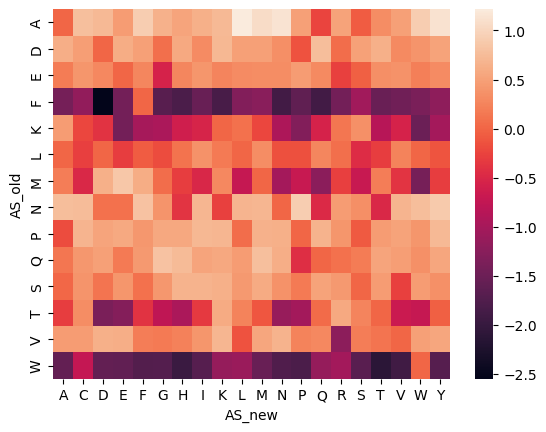

In [49]:
import seaborn as sns
sns.heatmap(dc.rmv_na(de.mean_substitutions(t1_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

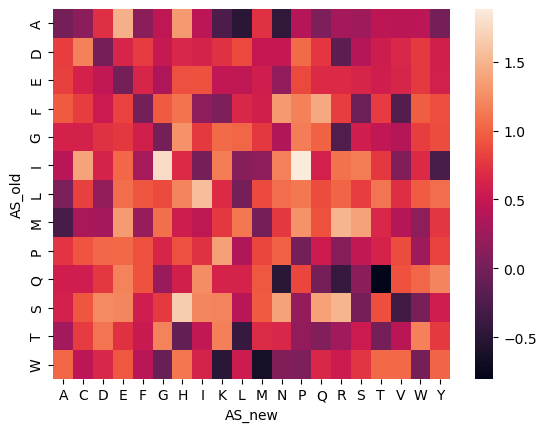

In [50]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(t2_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

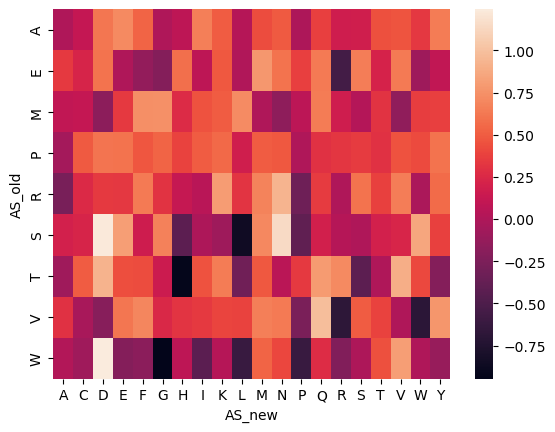

In [51]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(pr_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

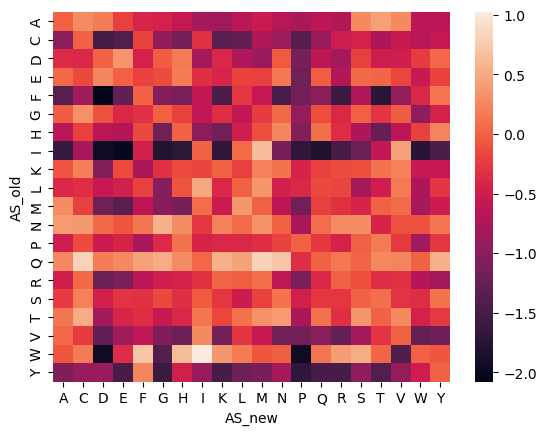

In [52]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(dna_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

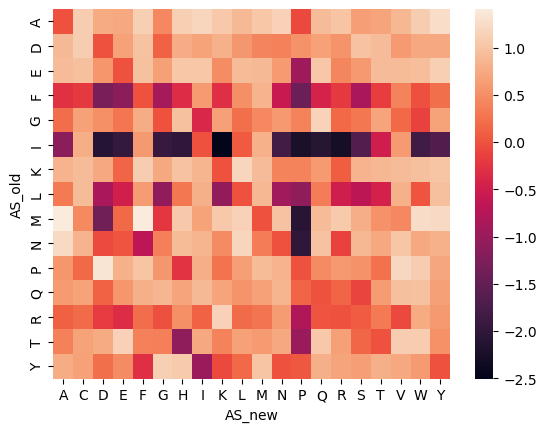

In [53]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(tetra_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

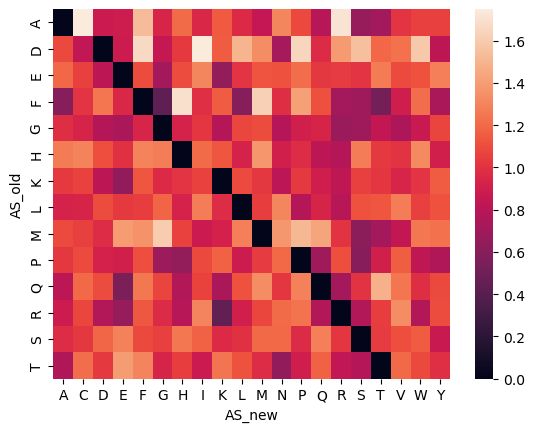

In [54]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(reg_list)))